# myChEMBL iPython Notebook Tutorial

## A Chemoinformatics taster using the RDKit toolkit and cartridge, the ChEMBL database and Pandas

### myChEMBL team, ChEMBL group, EMBL-EBI.

#### myChEMBL publication (Open Access): http://bioinformatics.oxfordjournals.org/content/early/2013/11/20/bioinformatics.btt666.abstract

#### Start with something relatively easy

In [1]:
print 'Hello World!'

Hello World!


In [2]:
1+4

5

#### Import IPython helpers

In [3]:
%matplotlib inline
%pylab inline
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


#### Import RDKit libraries

In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit import DataStructs

### Simple RDKit stuff - Molecules, descriptors and similarity

#### Molecule from SMILES

In [5]:
smi = 'CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4' #sildenafil
m = Chem.MolFromSmiles(smi)

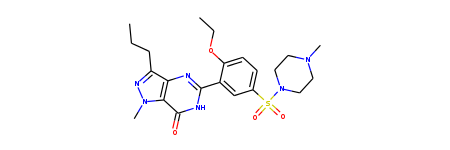

In [6]:
m

#### Simple descriptors

In [7]:
Descriptors.MolWt(m)

474.5870000000004

In [8]:
Descriptors.TPSA(m)

113.41999999999999

In [9]:
Descriptors.RingCount(m)

4

#### Output to various text formats

In [10]:
Chem.MolToSmiles(m, True)

'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12'

In [11]:
Chem.MolToInchi(m)

'InChI=1S/C22H30N6O4S/c1-5-7-17-19-20(27(4)25-17)22(29)24-21(23-19)16-14-15(8-9-18(16)32-6-2)33(30,31)28-12-10-26(3)11-13-28/h8-9,14H,5-7,10-13H2,1-4H3,(H,23,24,29)'

In [12]:
print Chem.MolToMolBlock(m)


     RDKit          

 33 36  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

In [13]:
# Let's add 2D coordinates...
Chem.Compute2DCoords(m)

0

In [14]:
# The mol block has been updated
print Chem.MolToMolBlock(m)


     RDKit          2D

 33 36  0  0  0  0  0  0  0  0999 V2000
   -8.2094    2.2189    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.5208    0.8863    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0224    0.8163    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3338   -0.5163    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0072   -1.8566    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9405   -2.9112    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1666   -4.3941    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6079   -2.2226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2044   -2.7522    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9613   -4.2323    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0441   -1.8015    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2872   -0.3214    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6907    0.2082    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8510   -0.7424    0

#### Fingerprints and similarity

In [15]:
fp = Chem.GetMorganFingerprintAsBitVect(m,2,nBits=2048)

In [16]:
fp.ToBitString()

'000000000000001000000000000000000000000000000000000000000000000000000000010000001000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000100000000000000000000000000000010000000000000000000000000100000000000000000001000010000000000000000000000000000001010000100000000100000000000100000000000000000010000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000100000000000000000000100000000000000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000001000000000000000000010000000000000000000000000000000000100000010000000000000000000000100000000000001000001000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000001000000000000000000000

In [17]:
fp.GetNumOnBits()

61

In [18]:
fp.GetNumBits()

2048

In [19]:
smi2 = 'CCCc1nc(C)c2C(=O)N=C(Nn12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(CC)CC4' #vardenafil
m2 = Chem.MolFromSmiles(smi2)

In [20]:
fp2 = Chem.GetMorganFingerprintAsBitVect(m2, 2, nBits=2048)

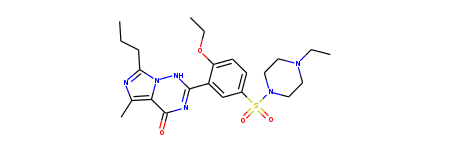

In [21]:
m2

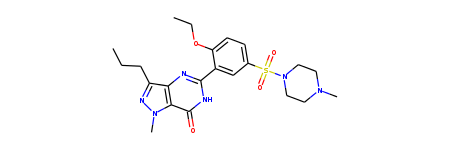

In [22]:
m

In [23]:
DataStructs.TanimotoSimilarity(fp,fp2)

0.5

#### Similarity Maps

(<matplotlib.figure.Figure at 0x7f505bf7d1d0>, 0.14414414414414412)

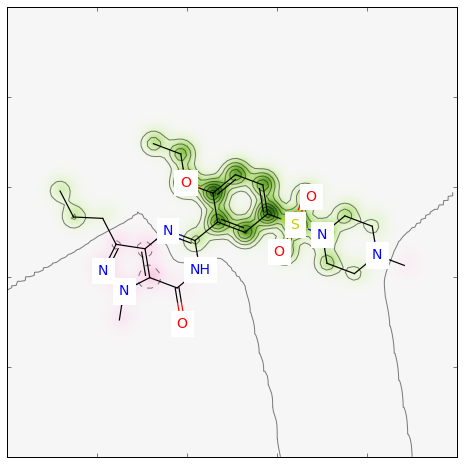

In [24]:
from rdkit.Chem.Draw import SimilarityMaps
SimilarityMaps.GetSimilarityMapForFingerprint(m2, m, SimilarityMaps.GetMorganFingerprint)

#### For more RDKit examples: http://www.rdkit.org/docs/GettingStartedInPython.html

### Using the RDKit database cartridge in myChEMBL

#### SMARTS-based substructure search

In [25]:
sma = 'C1C[!#1!#6]1' #oxirane or aziridine

In [26]:
from IPython.display import Image
from urllib import quote_plus

In [27]:
Image(url='http://www.smartsview.de/smartsview/auto/png/1/dynamic/{0}'.format(quote_plus(sma)))

In [28]:
import psycopg2

In [29]:
conn = psycopg2.connect(port=5432, user='chembl', dbname='chembl_21')

In [30]:
cur = conn.cursor()

In [31]:
sql1 = """
SELECT mr.*, md.chembl_id, cp.full_mwt, cp.alogp
from mols_rdkit mr, molecule_dictionary md, compound_properties cp
where
mr.m @> 'C1C[!#1!#6]1'::qmol
and
mr.molregno = md.molregno
and
md.molregno = cp.molregno
limit 100
"""

In [32]:
cur.execute(sql1)

In [33]:
for c in cur: print c

(1940080, 'C[N+](C)(CCCCCC[N+]1(C)[C@H]2C[C@@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21)CCCN1C(=O)c2ccccc2C1=O', 'CHEMBL3558234', Decimal('619.79'), Decimal('0.55'))
(1940079, 'CC(C)(CN1C(=O)c2cccc3cccc(c23)C1=O)C[N+](C)(C)CCCCCC[N+]1(C)[C@H]2C[C@@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@H]1O[C@@H]21', 'CHEMBL3558233', Decimal('697.90'), Decimal('2.31'))
(1521972, 'CO[C@H]1[C@H]([C@@]2(C)O[C@@H]2CC=C(C)C)[C@@](O)(CCl)CC[C@H]1OC(=O)CCC(=O)O', 'CHEMBL2332344', Decimal('418.91'), Decimal('2.06'))
(1591552, 'CC(C)C[C@H](NC(=O)[C@@H]1O[C@@H]1C(=O)O)C(=O)N1CCC[C@H]1C(=O)OCc1ccccc1', 'CHEMBL3038001', Decimal('432.47'), Decimal('1.55'))
(1797500, 'C[C@]12CC[C@H]3[C@@H](CC[C@@]45O[C@H]4C(O)=C(C#N)C[C@]35C)[C@H]1CC[C@H]2O', 'CHEMBL3348889', Decimal('329.43'), Decimal('2.43'))
(1589413, 'CC(C)NC(=O)Nc1ccc(Oc2ccc(S(=O)(=O)CC3CS3)cc2)cc1', 'CHEMBL2442884', Decimal('406.52'), Decimal('3.22'))
(1589421, 'CC(C)OC(=O)Oc1ccc(Oc2ccc(S(=O)(=O)CC3CS3)cc2)cc1', 'CHEMBL2442892', Decimal('408.49'), Decim

#### Similarity-based (NN) search

In [34]:
smi = 'CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4' #sildenafil

In [35]:
sql2 = """
select molregno,m as smiles,tanimoto_sml(morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol),mfp2) as similarity
from fps_rdkit join mols_rdkit using (molregno)
where morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol)%mfp2
order by morganbv_fp('CCCc1nn(C)c2C(=O)NC(=Nc12)c3cc(ccc3OCC)S(=O)(=O)N4CCN(C)CC4'::mol)<%>mfp2;
"""


In [36]:
cur.execute(sql2)

In [37]:
for c in cur: print c

(410802, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 1.0)
(1351310, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12', 0.88135593220339)
(1351311, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12', 0.88135593220339)
(80636, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12', 0.866666666666667)
(80694, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12', 0.838709677419355)
(488008, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(c5ccccc5)CC4)ccc3OCC)nc12', 0.825396825396825)
(512303, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCC(C(N)=O)CC4)ccc3OCC)nc12', 0.8125)
(410662, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCC(=O)O)CC4)ccc3OCC)nc12', 0.8125)
(488151, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C5CCCCC5)CC4)ccc3OCC)nc12', 0.8)
(1334756, 'CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(C)nn(C)c2c(=O)[nH]1', 0.8)
(488072, 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(c5ccc(F)cc5)CC4)ccc3OCC)nc12', 0.8)
(410656, 'CCCc1nn

#### More about the RDKit Cartridge here: http://www.rdkit.org/docs/Cartridge.html

### Working with Pandas

In [38]:
from rdkit.Chem import PandasTools
import pandas as pd

In [39]:
data = pd.read_sql(sql2, conn)

In [40]:
data.shape

(217, 3)

In [41]:
data.head()

,molregno,smiles,similarity
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356
2,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710


#### Filter the table

In [42]:
nn = data[data['similarity'] >= 0.8]

In [43]:
nn.shape

(12, 3)

In [44]:
nn.head()

,molregno,smiles,similarity
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356
2,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710


#### Add RDKit molecules and descriptors to the table

In [45]:
PandasTools.AddMoleculeColumnToFrame(data,smilesCol='smiles',molCol='mol',includeFingerprints=True)

,molregno,smiles,similarity,mol
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,
2,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,

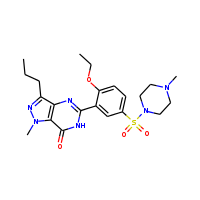
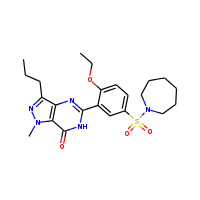
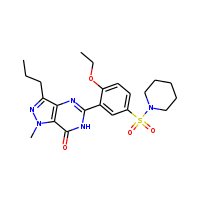
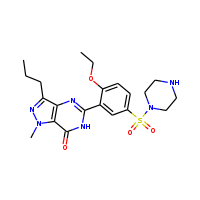
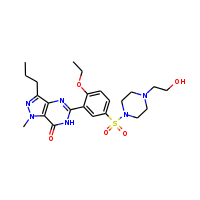

In [46]:
data.head()

In [47]:
data['logp'] = data['mol'].map(Descriptors.MolLogP)
data['mw'] = data['mol'].map(Descriptors.MolWt)

,molregno,smiles,similarity,mol,logp,mw
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,,3.2395,473.599
2,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,,2.8494,459.572
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,,1.2687,460.560
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,,0.9734,504.613

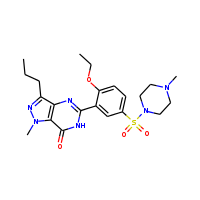
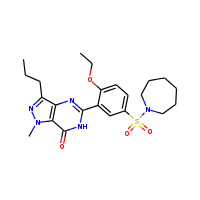
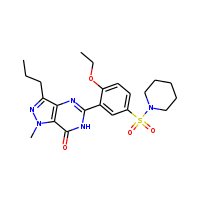
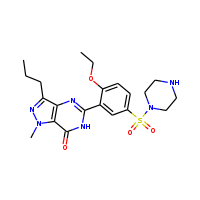
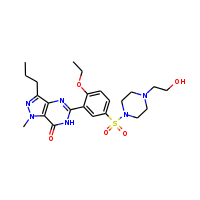

In [48]:
data.head()

,molregno,smiles,similarity,mol,logp,mw
216,453288,CCCc1c2nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)cnc3OCCOC)[nH]c(=O)c2nn1C,0.5,,1.0225,519.628
207,1353818,CCCc1nn(C)c2c(=O)[nH]c(-c3cccc(Cl)c3)nc12,0.5,,2.9295,302.765
208,140451,CCOc1ccc(S(=O)(=O)N2CCN(CCO)CC2)cc1-c1nc2c(=O)n(C)c(=O)n(CC(C)C)c2[nH]1,0.5,,0.4436,534.639
209,1353816,CCCc1nn(C)c2c(=O)[nH]c(-c3ccc(Cl)cc3)nc12,0.5,,2.9295,302.765
210,1334770,CCCc1nn(C)c2c(=O)[nH]c(-c3ccc(=O)[nH]n3)nc12,0.5,,0.3594,286.295

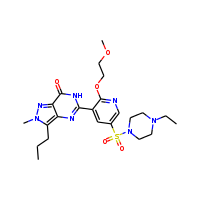
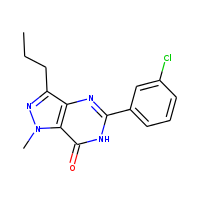
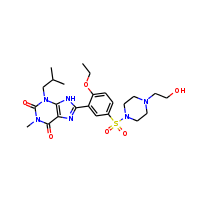
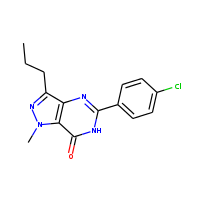
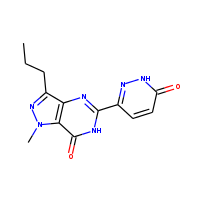

In [49]:
data.sort(columns=['similarity']).head()

#### Simple plotting using the table columns

In [50]:
data[['mw', 'logp']].describe()

,mw,logp
count,217.000000,217.000000
mean,487.381023,2.263238
std,91.319758,0.965502
min,268.320000,-0.048300
25%,448.589000,1.548900
50%,491.614000,2.286600
75%,533.448000,2.894700
max,866.980000,4.731700


In [51]:
rcParams['figure.figsize'] = 12,12

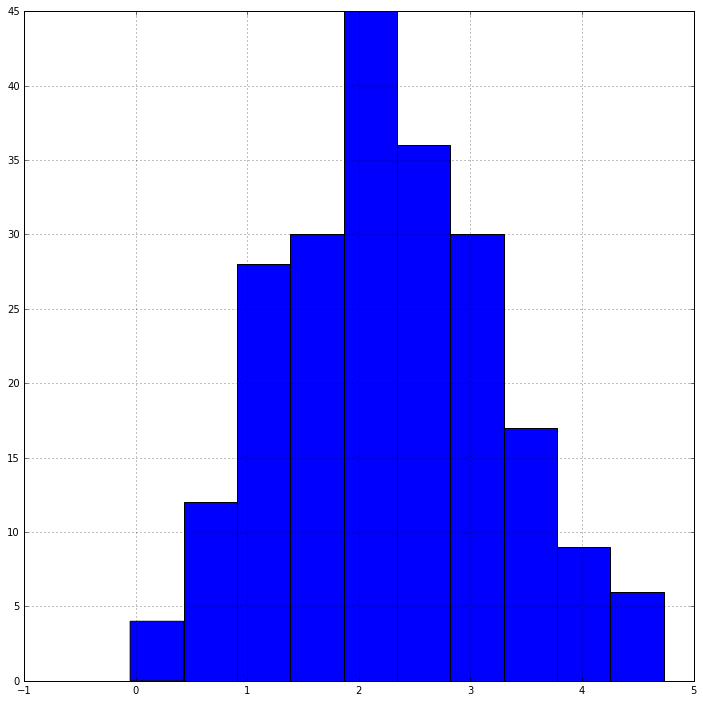

In [52]:
data['logp'].hist()

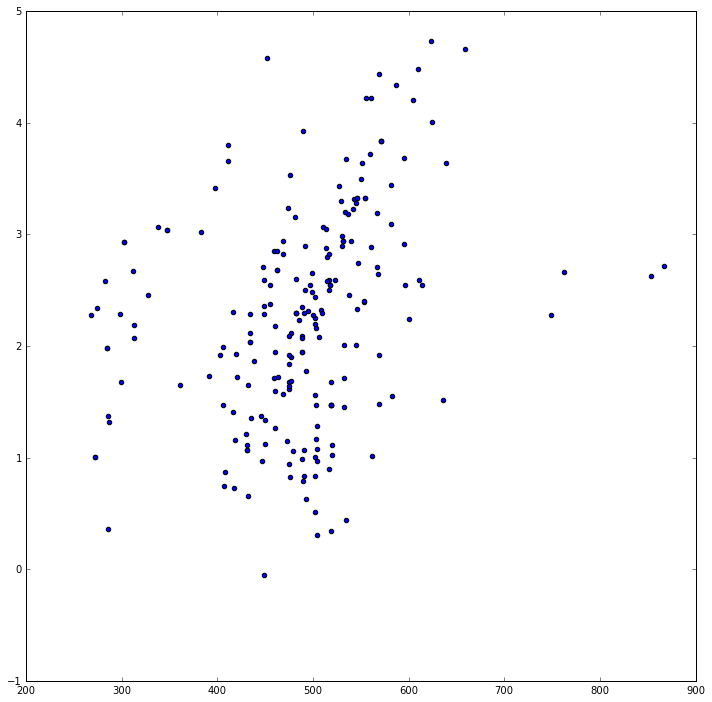

In [53]:
scatter(data['mw'],data['logp'])

,molregno,mol,mw,logp
74,487046,,852.997,2.6245
105,487045,,866.980,2.7168

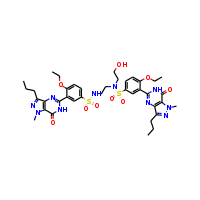
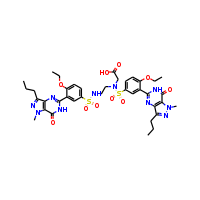

In [54]:
data[data['mw']>800][['molregno','mol','mw','logp']]

#### Substructure search within the table

In [55]:
qsmi = 'c1nn(C)c2c1nc[nH]c2=O'

In [56]:
qmol = Chem.MolFromSmiles(qsmi)

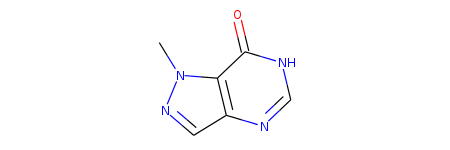

In [57]:
qmol

In [58]:
subset = data[data['mol'] >= qmol]

In [59]:
subset.shape

(103, 6)

,molregno,smiles,similarity,mol,logp,mw
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,,3.2395,473.599
2,1351311,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCC4)ccc3OCC)nc12,0.881356,,2.8494,459.572
3,80636,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4)ccc3OCC)nc12,0.866667,,1.2687,460.560
4,80694,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(CCO)CC4)ccc3OCC)nc12,0.838710,,0.9734,504.613

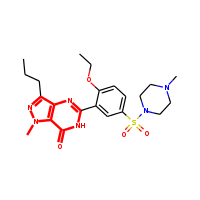
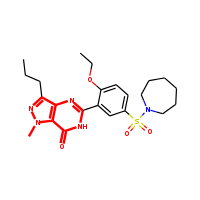
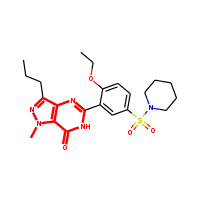
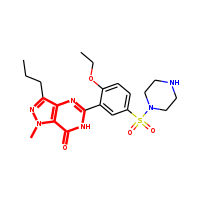
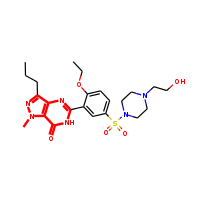

In [60]:
subset.head()

In [61]:
data.groupby(data['mol'] >= qmol).describe().unstack()

molregno                                                                                    similarity                                                                    logp                                                                  mw                                                                       
         count           mean            std      min        25%       50%         75%        max      count      mean       std  min       25%       50%       75%       max  count      mean       std     min     25%      50%     75%     max  count        mean         std      min       25%      50%       75%      max
mol                                                                                                                                                                                                                                                                                                                            
False    114.0  886740.473684  597207.645589  28710.0  310086.75  565658.0  1441764.75  1831663.0      114.0  0.594148  0.053740  0.5  0.560411  0.598611  0.625946  0.734375  114.0  2.025773  0.780307 -0.0483  1.4712  2.07581  2.5482  4.4372  114.0  493.521193   58.942393  391.453  456.1290  489.106  518.6400  762.879
True     103.0  851594.970874  562828.499705  80558.0  410705.00  488147.0  1351307.50  1831961.0      103.0  0.672338  0.107084  0.5  0.577465  0.691176  0.740659  1.000000  103.0  2.526063  1.080157  0.3034  1.6615  2.59310  3.3193  4.7317  103.0  480.585107  117.141116  268.320  415.5065  502.641  552.6255  866.980

In [62]:
data['containsQ'] = data['mol'] >= qmol

,molregno,smiles,similarity,mol,logp,mw,containsQ
0,410802,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12,1.000000,,1.6109,474.587,True
1,1351310,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCCCCC4)ccc3OCC)nc12,0.881356,,3.2395,473.599,True

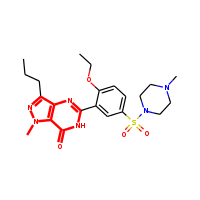
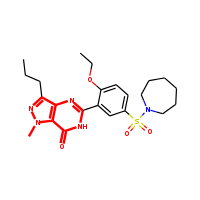

In [63]:
data.head(2)

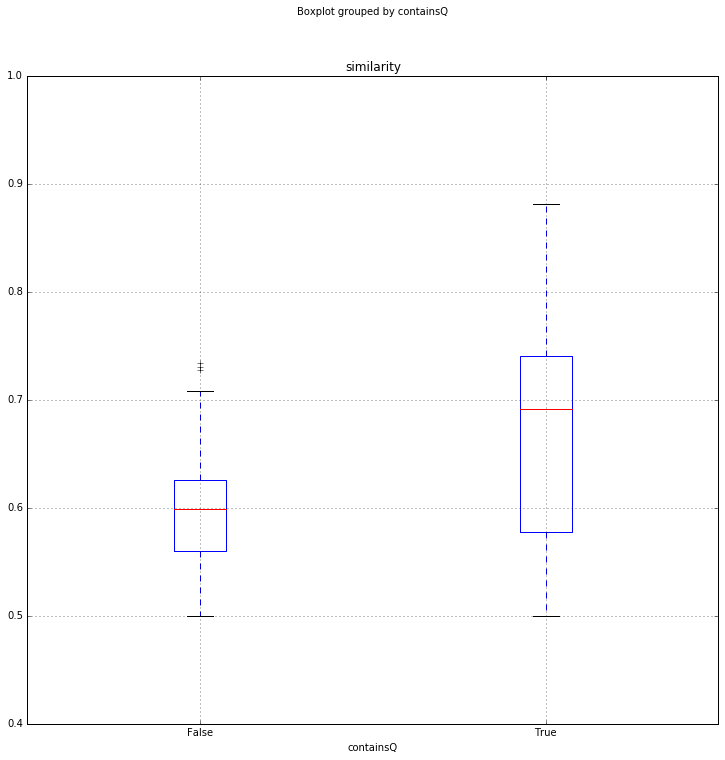

In [64]:
data.boxplot('similarity',by='containsQ')

In [65]:
conn.close()

#### More useful RDKit stuff here:  http://www.rdkit.org/UGM/2012/ and  https://github.com/rdkit/UGM_2013